 # Portfolio Analysis
 ---

In [172]:
# The following is a script to do the following:
# 1.Clean data sets of returns data for portfolios of mulitple whale investors and algorithms over a set time period. 
# 2.Compute returns for the S&P 500 over the same time period.
# 3.Perform statistical analysis of the returns of the portfolios and the S&P 500, and determine how whether the alogorithmic portfolios outcompete the rest.
# 4. Create a custom portfolio of 3 stocks to determine if they outperform the all of the portfolios and the S&P 500.

In [173]:
# Initial imports of libraries and functions
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

## Whale Investor Daily Returns

In [174]:
# Read in the whale returns to a new dataframe with the date as the index, and then sort the index in ascending order
whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)

In [175]:
# Display information about the whale returns dataframe to get an idea of what is inside (data types, etc.) and then count the number of null values
whale_df.info()
whale_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [176]:
# Drop the null values in the whale returns dataframe and save over the original dataframe
whale_df = whale_df.dropna()

## Algorithmic Daily Returns

In [177]:
# Read in the algorithm returns to a new dataframe with the date as the index, and then sort the index in ascending order
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(inplace=True)

In [178]:
# Display information about the algorithm returns dataframe to get an idea of what is inside (data types, etc.) and then count the number of null values
algo_df.info()
algo_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


Algo 1    0
Algo 2    6
dtype: int64

In [179]:
# Drop the null values in the algorithm returns dataframe and save over the original dataframe
algo_df = algo_df.dropna()

## S&P 500 Daily Returns

In [180]:
# Read in the S&P 500 closing prices to a new dataframe with the date as the index, and then sort the index in ascending order
sp500_prices_path = Path("Resources/sp500_history.csv")
sp500_prices_df = pd.read_csv(sp500_prices_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_prices_df.sort_index(inplace=True)

In [181]:
# Display information about the S&P 500 dataframe to get an idea of what is inside (including data types)
sp500_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [182]:
# Remove the dollar signs from the closing prices column (warning message is for future Pandas update, but the code still executes as required here)
sp500_prices_df["Close"] = sp500_prices_df["Close"].str.replace("$","")

C:\Users\bradl\AppData\Local\Temp/ipykernel_11980/3613562770.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_prices_df["Close"] = sp500_prices_df["Close"].str.replace("$","")


In [183]:
# Convert the data type for the closing prices to float
sp500_prices_df["Close"] = sp500_prices_df["Close"].astype(float)

In [184]:
# Calculate the S&P 500 daily returns and save in a new dataframe
sp500_returns_df = sp500_prices_df.pct_change()

In [185]:
# Drop the null values in the S&P 500 returns dataframe and save over the dataframe
sp500_returns_df = sp500_returns_df.dropna()

In [186]:
# Rename the "Close" column since it is now the calculated daily return
sp500_returns_df = sp500_returns_df.rename(columns={"Close":"S&P 500"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [187]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single dataframe with columns for each portfolio's returns.
combined_returns = pd.concat([whale_df, algo_df, sp500_returns_df], axis="columns", join="inner")

---

# Conduct Quantitative Analysis

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Portfolio Returns'}, xlabel='Date', ylabel='Daily Return'>

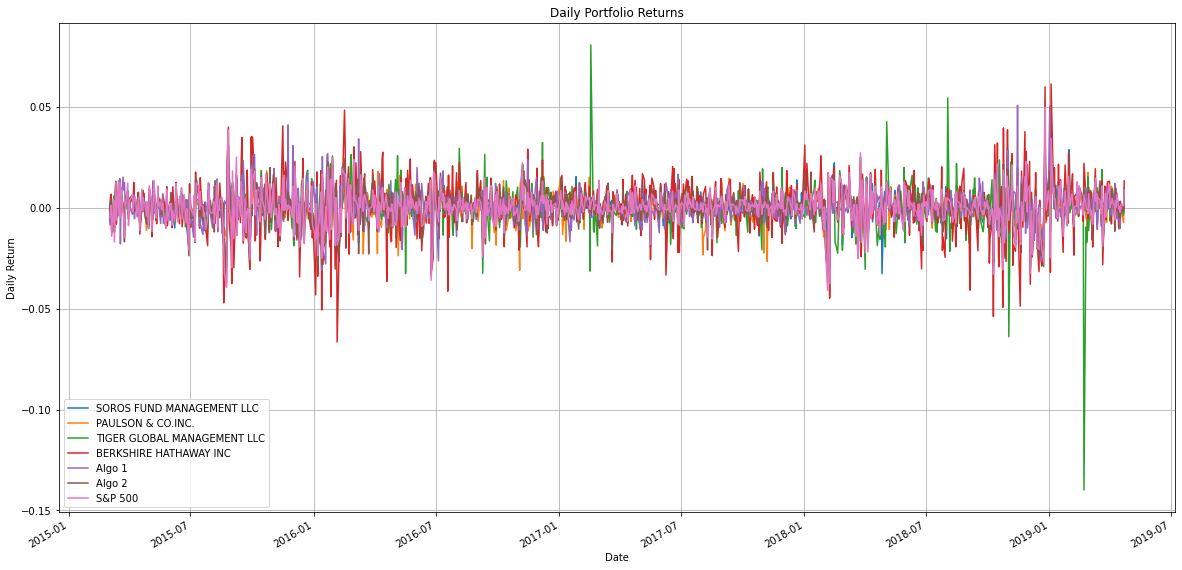

In [188]:
# Plot the daily returns for each portfolio on a combined plot
combined_returns.plot(title = "Daily Portfolio Returns", figsize = (20,10), ylabel="Daily Return", grid=True)

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Portfolio Returns'}, xlabel='Date', ylabel='Cumulative Return'>

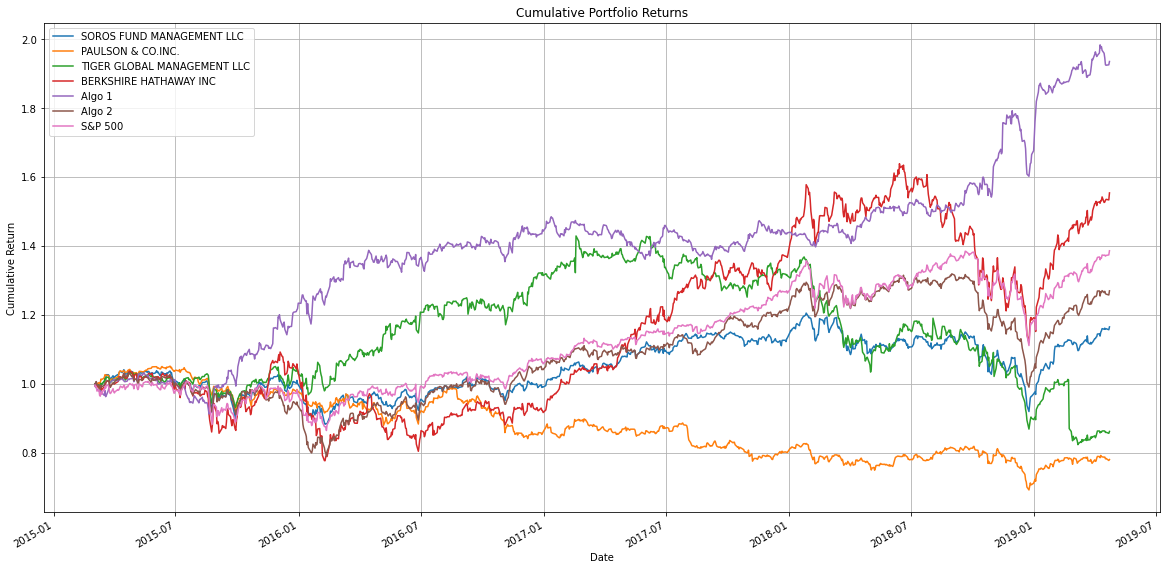

In [189]:
# Calculate the cumulative returns of each portfolio
combined_cumulative_returns = (1 + combined_returns).cumprod()

# Plot the cumulative returns for each portfolio on a combined plot
combined_cumulative_returns.plot(title = "Cumulative Portfolio Returns", figsize = (20,10), ylabel="Cumulative Return", grid=True)

---

## Risk Analysis

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Portfolio Returns'}, ylabel='Daily Return'>

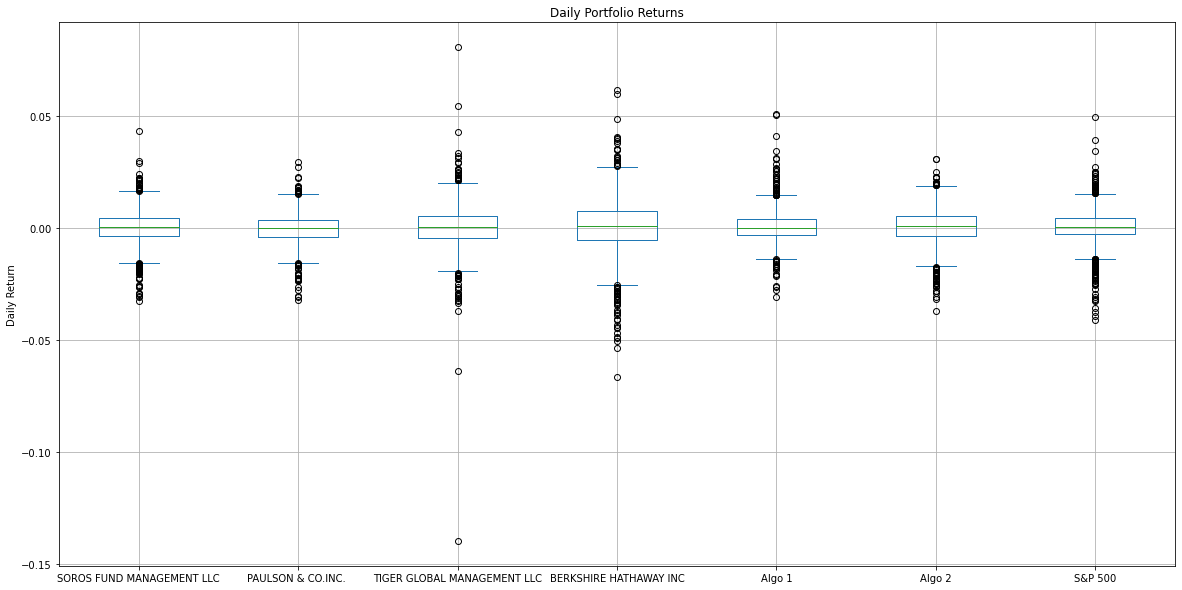

In [190]:
# Create a box plot for each portfolio to visually show risk
combined_returns.plot.box(title = "Daily Portfolio Returns", figsize = (20,10), ylabel="Daily Return", grid=True)

### Calculate standard deviations of the portfolios

In [191]:
# Calculate the daily standard deviation for all portfolios and the S&P 500
soros_daily_std = combined_returns["SOROS FUND MANAGEMENT LLC"].std()
paulson_daily_std = combined_returns["PAULSON & CO.INC. "].std()
tiger_daily_std = combined_returns["TIGER GLOBAL MANAGEMENT LLC"].std()
berkshire_daily_std = combined_returns["BERKSHIRE HATHAWAY INC"].std()
algo1_daily_std = combined_returns["Algo 1"].std()
algo2_daily_std = combined_returns["Algo 2"].std()

combined_returns_std = {
    "SOROS FUND MANAGEMENT LLC" : soros_daily_std,
    "PAULSON & CO.INC." : paulson_daily_std,
    "TIGER GLOBAL MANAGEMENT LLC" : tiger_daily_std,
    "BERKSHIRE HATHAWAY INC" : berkshire_daily_std,
    "Algo 1" : algo1_daily_std,
    "Algo 1" : algo2_daily_std
}

### Determine which portfolios are riskier than the S&P 500

In [192]:
# Calculate the daily standard deviation of the S&P 500
sp500_daily_std = combined_returns["S&P 500"].std()

In [193]:
# Determine which portfolios are riskier than the S&P 500 (i.e. standard deviation of portfolio > standard deviation of S&P 500)
for returns in combined_returns_std:
    if sp500_daily_std < combined_returns_std[returns]:
        print(f"{returns} is riskier than the S&P 500")

TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P 500
BERKSHIRE HATHAWAY INC is riskier than the S&P 500


###  Calculate the Annualized Standard Deviation

In [194]:
# Calculate the annualized standard deviation (252 trading days) for all portfolios and the S&P 500
combined_returns_annual_std = combined_returns.std() * np.sqrt(252)
combined_returns_annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation of Portfolio Returns'}, xlabel='Date', ylabel='Rolling 21-Day Standard Deviation'>

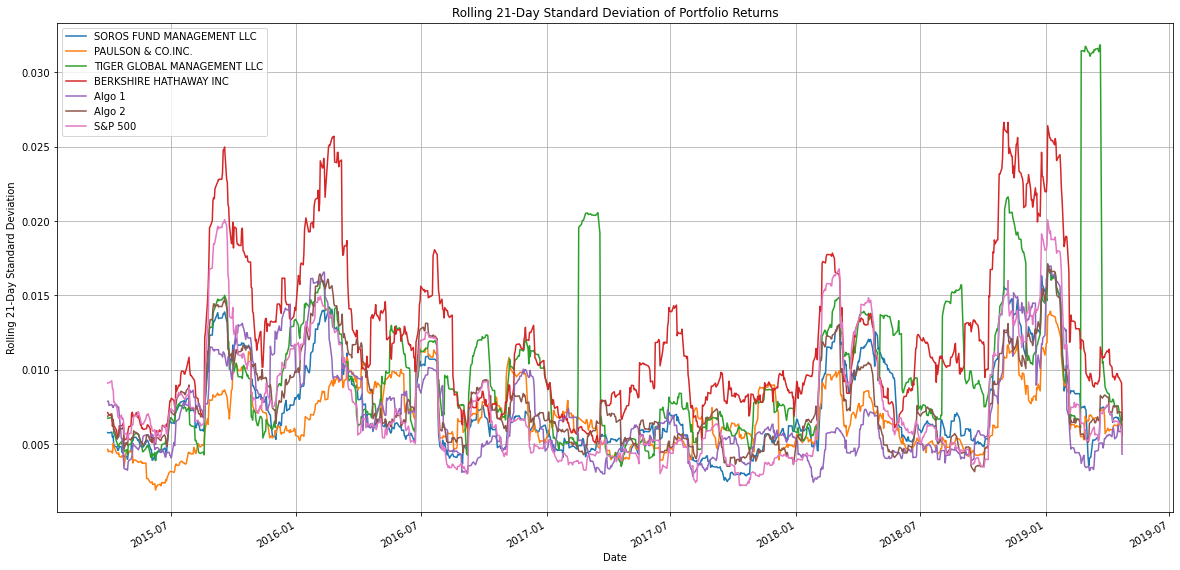

In [195]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
combined_returns.rolling(window=21).std().plot(title = "Rolling 21-Day Standard Deviation of Portfolio Returns", figsize = (20,10), ylabel="Rolling 21-Day Standard Deviation", grid=True)

### Calculate and plot the correlation

<AxesSubplot:>

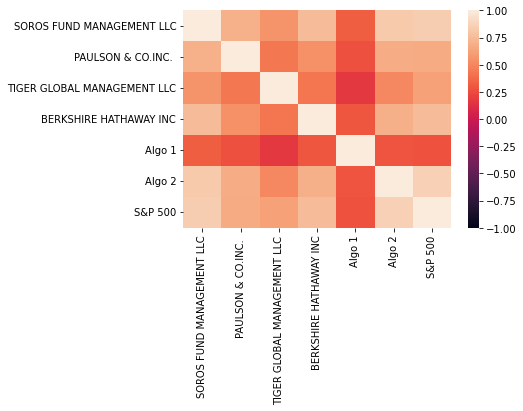

In [196]:
# Calculate the correlation between the portfolios and S&P 500
portfolios_correlation = combined_returns.corr()

# Display the correlations in a correlations matrix (i.e., heat map)
sns.heatmap(portfolios_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Soros Fund Management LLC Beta Trend'}, xlabel='Date', ylabel='Rolling 60-Day Beta'>

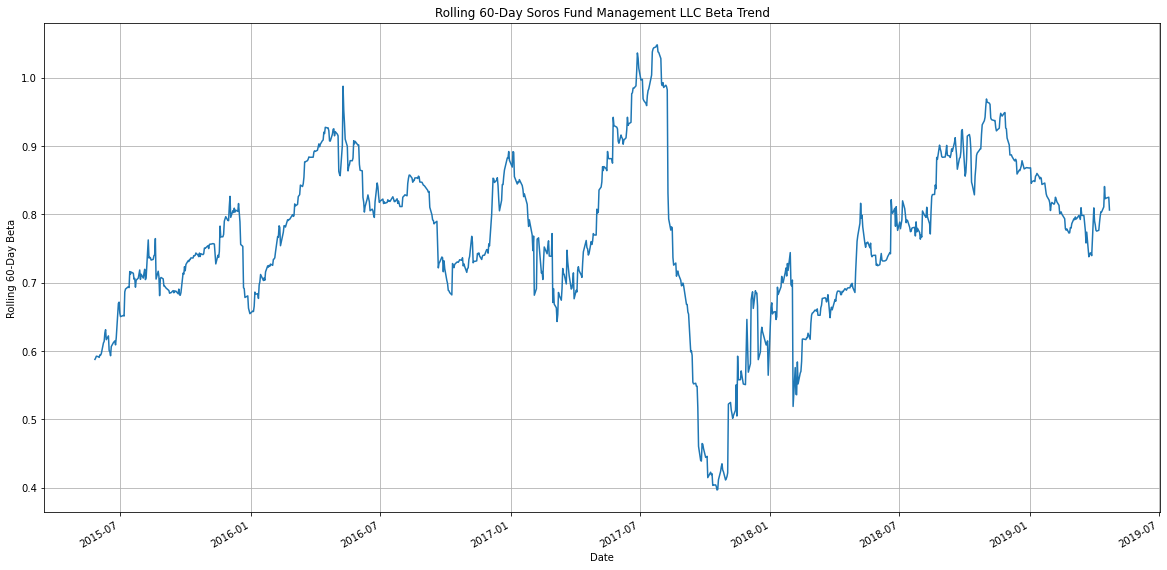

In [197]:
# Here, Soros Fund Management LLC was chosen for the 60-day rolling beta calculations and plotting since it may mimic the S&P 500 based on the correlation/heat map.
# Calculate the 60-day rolling covariance of Soros Fund Management LLC and the S&P 500
soros_rolling_covariance = combined_returns["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(combined_returns["S&P 500"])

# Calculate the 60-day rolling variance of the S&P 500
sp500_rolling_variance = combined_returns["S&P 500"].rolling(window=60).var()

# Compute the 60-day rolling beta for the Soros Fund Management LLC
soros_rolling_beta = soros_rolling_covariance / sp500_rolling_variance

# Plot the 60-day rolling beta for Soros Fund Management LLC
soros_rolling_beta.plot(title = "Rolling 60-Day Soros Fund Management LLC Beta Trend", figsize = (20,10), ylabel="Rolling 60-Day Beta", grid=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Rolling 60-Day Soros Fund Management LLC Beta Trend'}, xlabel='Date', ylabel='Rolling 60-Day Beta'>

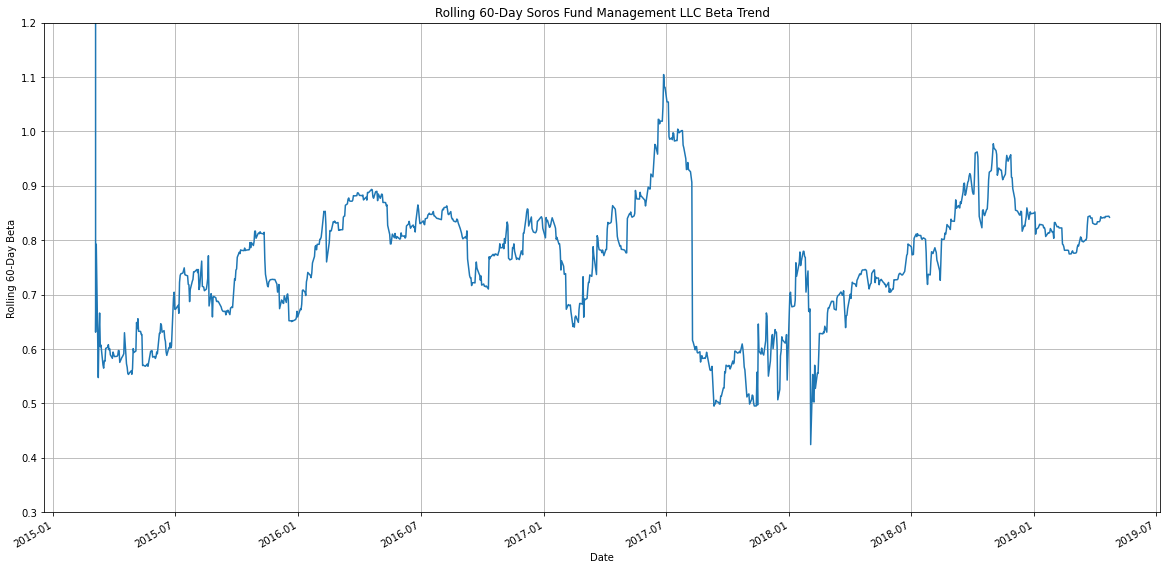

In [198]:
#Use `ewm` to calculate the exponentially weighted rolling beta (similar steps as the previous calculations) for Soros Fund Management LLC using a 21-day half life
soros_ewm_covariance = combined_returns["SOROS FUND MANAGEMENT LLC"].ewm(halflife=21).cov(combined_returns["S&P 500"])

sp500_ewm_variance = combined_returns['S&P 500'].ewm(halflife=21).var()

soros_ewm_beta = soros_ewm_covariance / sp500_ewm_variance

#Plot the exponentially weighted rolling beta for Soros Fund Management LLC
soros_ewm_beta.plot(title = "Rolling 60-Day Soros Fund Management LLC Beta Trend", figsize = (20,10), ylabel="Rolling 60-Day Beta", ylim=(0.3,1.2),grid=True)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [199]:
# Calculate the annualized Sharpe Ratios
# Assume the risk free rate is zero which is sufficient since this will be assumed in the calcualtion for all portfolios and the S&P 500 for comparison
portfolio_sharpe_ratios = combined_returns.mean() / (combined_returns.std()*np.sqrt(252))
portfolio_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.001414
PAULSON & CO.INC.             -0.001919
TIGER GLOBAL MANAGEMENT LLC   -0.000480
BERKSHIRE HATHAWAY INC         0.002468
Algo 1                         0.005471
Algo 2                         0.001990
S&P 500                        0.002572
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}, ylabel='Annualized Sharpe Ratio'>

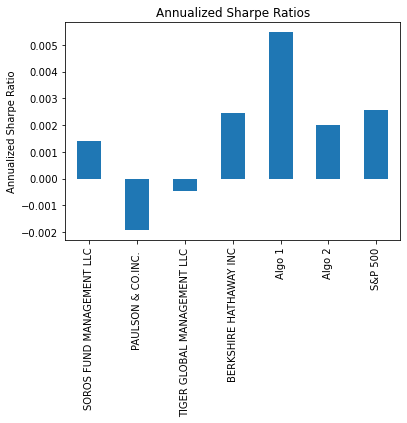

In [200]:
# Plot the annualized Sharpe Ratios as a bar plot to visualize them for analysis
portfolio_sharpe_ratios.plot(kind="bar", title="Annualized Sharpe Ratios", ylabel="Annualized Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Both Algorithm portfolios are less risky than the S&P 500, but they're more risky than the Soros Fund Management and Paulson & Co. whale portfolios. This alone can't
determine performance, so the Sharpe Ratios were considered. Alogorithm 1 has the highest Sharpe Ratio of all portfolios and the S&P 500, so it generated the highest returns 
(i.e, outperformed all others) on a risk-adjusted basis. Algorithm 2 had a Sharpe Ratio less than that of the S&P 500 and Berkshire Hathaway. Therefore, Algorithm 2 only 
outperformed Soros Fund Management, Paulson & Co., and Tiger Global Management on a risk-adjusted basis. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

## For this custom portfolio, the following stocks were chosen: Disney (DIS), Amazon (AMZN), and Microsoft (MSFT)

In [201]:
# Read in the Disney price data
dis_path = Path("Resources/dis_closing_prices.csv")
dis_df = pd.read_csv(dis_path, infer_datetime_format=True, parse_dates=True)

# Convert the date using the datetime library and then remove the timestamp
dis_df['Date'] = pd.to_datetime(dis_df['Date'])
dis_df['Date'] = dis_df['Date'].dt.date

# Set the date as the index, and sort in ascending order
dis_df = dis_df.set_index("Date")
dis_df.sort_index(inplace=True)

In [202]:
# Read in the Amazon price data
amzn_path = Path("Resources/amzn_closing_prices.csv")
amzn_df = pd.read_csv(amzn_path, infer_datetime_format=True, parse_dates=True)

# Convert the date using the datetime library and then remove the timestamp
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])
amzn_df['Date'] = amzn_df['Date'].dt.date

# Set the date as the index, and sort in ascending order
amzn_df = amzn_df.set_index("Date")
amzn_df.sort_index(inplace=True)

In [203]:
# Read in the Microsfot price data
msft_path = Path("Resources/msft_closing_prices.csv")
msft_df = pd.read_csv(msft_path, infer_datetime_format=True, parse_dates=True)

# Convert the date using the datetime library and then remove the timestamp
msft_df['Date'] = pd.to_datetime(msft_df['Date'])
msft_df['Date'] = msft_df['Date'].dt.date

# Set the date as the index, and sort in ascending order
msft_df = msft_df.set_index("Date")
msft_df.sort_index(inplace=True)

In [204]:
# Combine all stocks in a single DataFrame
custom_portfolio_prices_df = pd.concat([dis_df, amzn_df, msft_df], axis="columns", join="inner")

In [205]:
# Reorganize dataframe with portfolio data by dropping the "Symbol" columns and renaming columns to only have one closing price column per symbol
custom_portfolio_prices_df.drop(columns="Symbol", inplace=True)
custom_portfolio_prices_df.columns = ["DIS Close", "AMZN Close", "MSFT Close"]
custom_portfolio_prices_df.head()

,DIS Close,AMZN Close,MSFT Close
Date,,,
2014-05-28,83.60,310.16,40.01
2014-05-29,84.03,313.78,40.34
2014-05-30,84.01,312.55,40.94
2014-06-02,84.27,308.84,40.79
2014-06-03,83.88,307.19,40.29


In [206]:
# Calculate the daily returns for the custom portfolio and drop the null values
custom_portfolio_returns_df = custom_portfolio_prices_df.pct_change().dropna()
custom_portfolio_returns_df.head()

,DIS Close,AMZN Close,MSFT Close
Date,,,
2014-05-29,0.005144,0.011671,0.008248
2014-05-30,-0.000238,-0.003920,0.014874
2014-06-02,0.003095,-0.011870,-0.003664
2014-06-03,-0.004628,-0.005343,-0.012258
2014-06-04,0.004292,-0.001335,0.000745


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [207]:
# Set equal weights for the stocks in the custom portfolio (i.e., one-third for each)
weights = [1/3, 1/3, 1/3]

# Calculate the returns of the custom portfolio using the weights
total_custom_returns_df = custom_portfolio_returns_df.dot(weights)
total_custom_returns_df.head()

Date
2014-05-29    0.008354
2014-05-30    0.003572
2014-06-02   -0.004146
2014-06-03   -0.007409
2014-06-04    0.001234
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [208]:
# Combine the custom portfolio returns with the data frame for the combined returns of the whales, algorithms, and S&P 500
comparison_returns_df = pd.concat([combined_returns, total_custom_returns_df], axis="columns", join="inner")
comparison_returns_df.head()

C:\Users\bradl\anaconda3\lib\site-packages\pandas\core\indexes\base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.004017
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.005777
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.003133
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.016292
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.007137


In [209]:
# Change the column title for the custom portfolio column since it is was brought in as an integer when it was combined into the dataframe
# First convert the columns into strings and then rename the last column for the custom portfolio
comparison_returns_df.columns = comparison_returns_df.columns.astype(str)
comparison_returns_df = comparison_returns_df.rename(columns={"0":"Custom Portfolio"})
comparison_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.004017
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.005777
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.003133
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.016292
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.007137


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [210]:
# Calculate the annualized standard deviation (252 trading days) for all portfolios (now including the custom portfolio) and the S&P 500
comparison_returns_annual_std = comparison_returns_df.std() * np.sqrt(252)
comparison_returns_annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
Custom Portfolio               0.197087
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation of Portfolio Returns'}, xlabel='Date', ylabel='Rolling 21-Day Standard Deviation'>

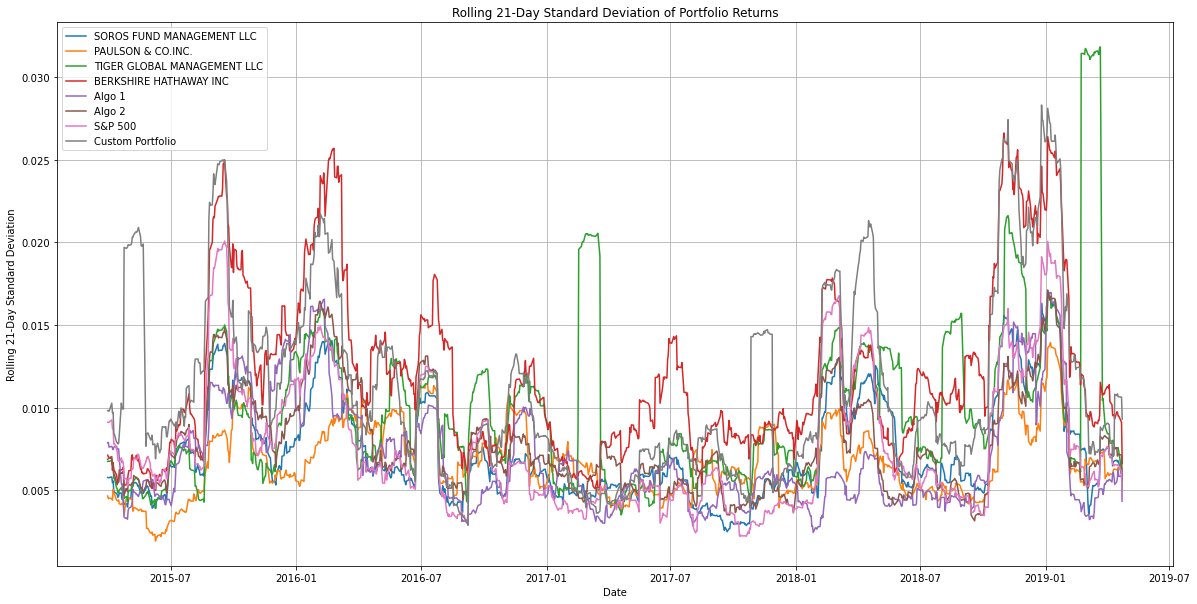

In [211]:
# Calculate and plot the rolling standard deviation for all portfolios (now including the custom portfolio) using a 21-day window
comparison_returns_df.rolling(window=21).std().plot(title = "Rolling 21-Day Standard Deviation of Portfolio Returns", figsize = (20,10), ylabel="Rolling 21-Day Standard Deviation", grid=True)

### Calculate and plot the correlation

<AxesSubplot:>

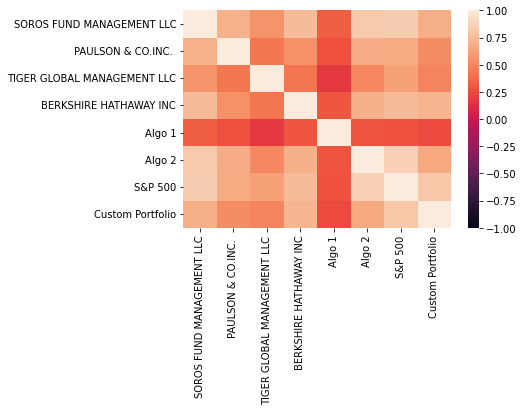

In [212]:
# Calculate the correlation between all the portfolios and S&P 500
portfolios_with_custom_correlation = comparison_returns_df.corr()

# Display the correlations in a correlations matrix (i.e., heat map)
sns.heatmap(portfolios_with_custom_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Custom Portfolio Beta Trend'}, xlabel='Date', ylabel='Rolling 60-Day Beta'>

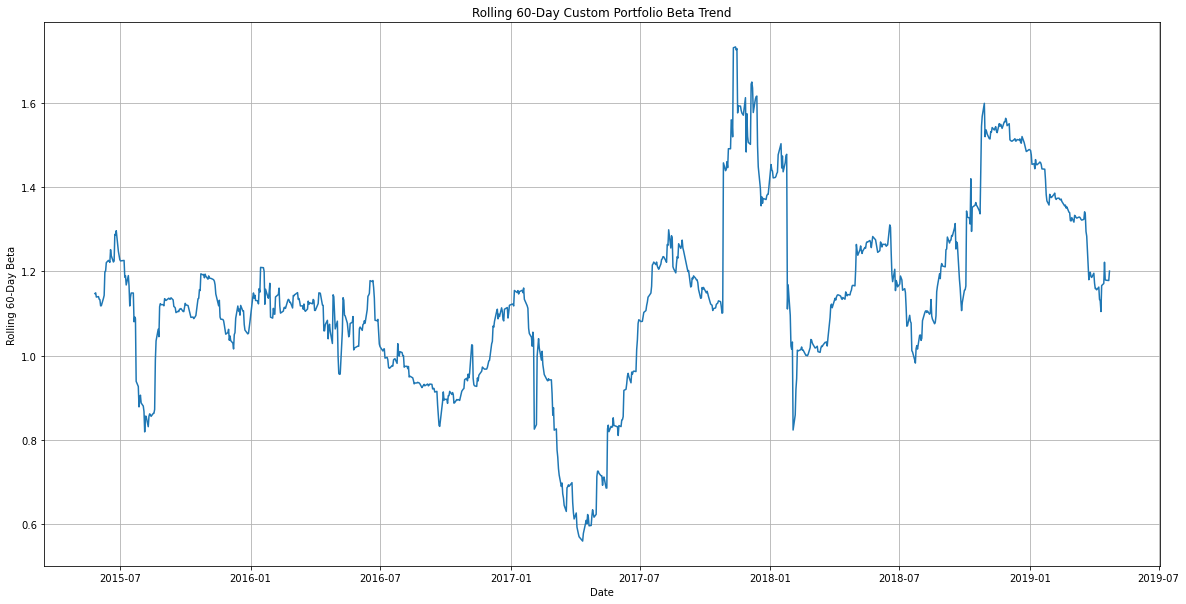

In [213]:
# Calculate the 60-day rolling covariance of the custom portfolio and the S&P 500
custom_covariance = comparison_returns_df["Custom Portfolio"].rolling(window=60).cov(comparison_returns_df["S&P 500"])

# Calculate the 60-day rolling variance of the S&P 500
sp500_updated_rolling_variance = comparison_returns_df["S&P 500"].rolling(window=60).var()

# Compute the 60-day rolling beta for the custom portfolio
custom_rolling_beta = custom_covariance / sp500_updated_rolling_variance

# Plot the 60-day rolling beta for the custom portfolio
custom_rolling_beta.plot(title = "Rolling 60-Day Custom Portfolio Beta Trend", figsize = (20,10), ylabel="Rolling 60-Day Beta", grid=True)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [214]:
# Calculate the annualized Sharpe Ratios for all portfolios (now including the custom portfolio) and the S&P 500
#Assume the risk free rate is zero which is sufficient since this will be assumed in the calcualtion for all portfolios and the S&P 500 for comparison
updated_sharpe_ratios = comparison_returns_df.mean() / (comparison_returns_df.std()*np.sqrt(252))
updated_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.001414
PAULSON & CO.INC.             -0.001919
TIGER GLOBAL MANAGEMENT LLC   -0.000480
BERKSHIRE HATHAWAY INC         0.002468
Algo 1                         0.005471
Algo 2                         0.001990
S&P 500                        0.002572
Custom Portfolio               0.005296
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}, ylabel='Annualized Sharpe Ratio'>

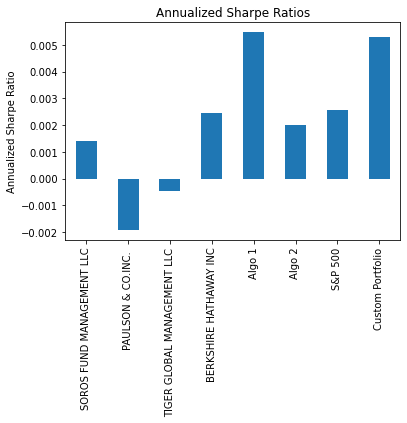

In [215]:
# Plot the annualized Sharpe Ratios as a bar plot to visualize them for analysis
updated_sharpe_ratios.plot(kind="bar", title="Annualized Sharpe Ratios", ylabel="Annualized Sharpe Ratio")

### How does your portfolio do?

Per the standard deviation calculations, the custom portfolio is riskier than the S&P 500 and all other portfolios except for Berkshire Hathaway. The plot of the 
60-day rolling beta for the custom portfolio reinforces that it is risky/more volatile as compared to the S&P 500 since its beta is greater than 1 for a 
majority of the time range of the data set. However, when taking into account the portfolio returns with this risk (i.e, the Sharpe Ratio), the custom portfolio 
shows the second highest Sharpe Ratio behind only Algorithm 1. Therefore, for the specified timeframe of the dataset, the custom portfolio generated higher returns 
on a risk-adjusted basis than all of the whale investors, the S&P 500, and Algorithm 2!